In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "hnsc-data"          "notebook9d39ba3a4b" "v333333"

In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
+   install.packages("BiocManager")

In [3]:
BiocManager::install("WGCNA") 

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'WGCNA'

also installing the dependencies ‘Biobase’, ‘IRanges’, ‘S4Vectors’, ‘dynamicTreeCut’, ‘fastcluster’, ‘impute’, ‘preprocessCore’, ‘GO.db’, ‘AnnotationDbi’


Old packages: 'actuar', 'adehabitatHR', 'admisc', 'afex', 'AID', 'ald', 'AMR',
  'apaTables', 'arsenal', 'arules', 'arulesViz', 'assertive.base', 'assertr',
  'astsa', 'aweek', 'backports', 'BART', 'bayesplot', 'bayestestR', 'bbotk',
  'beeswarm', 'benchmarkme', 'bestNormalize', 'betareg', 'BH', 'bibliometrix',
  'bigparallelr', 'bigstatsr', 'bindata', 'BiocManager', 'bipartite', 'blme',
  'BMA', 'Boom', 'boot', 'breakDown', 'brglm2', 'brio', 'brms', 'broom',
  'broomExtra', 'butcher', 'callr', 'candisc', 'cartography', 'caTools',
  'CausalImpact', 'cellWise', 'ChainLadder', 'ChannelAttribution', 'CINNA',
  'circlize', 'class', 'cld2', 'cli', 'clusterGeneration', 'clustMixType',
  'clValid', 'coefplot', 'coin', 'colordistance', 'col

In [4]:
library(WGCNA);


Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor




In [5]:
BiocManager::install("GO.db")

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'GO.db'

Old packages: 'actuar', 'adehabitatHR', 'admisc', 'afex', 'AID', 'ald', 'AMR',
  'apaTables', 'arsenal', 'arules', 'arulesViz', 'assertive.base', 'assertr',
  'astsa', 'aweek', 'backports', 'BART', 'bayesplot', 'bayestestR', 'bbotk',
  'beeswarm', 'benchmarkme', 'bestNormalize', 'betareg', 'BH', 'bibliometrix',
  'bigparallelr', 'bigstatsr', 'bindata', 'BiocManager', 'bipartite', 'blme',
  'BMA', 'Boom', 'boot', 'breakDown', 'brglm2', 'brio', 'brms', 'broom',
  'broomExtra', 'butcher', 'callr', 'candisc', 'cartography', 'caTools',
  'CausalImpact', 'cellWise', 'ChainLadder', 'ChannelAttribution', 'CINNA',
  'circlize', 'class', 'cld2', 'cli', 'clusterGeneration', 'clustMixType',
  'clValid', 'coefplot', 'coin', 'colordistance', 'colourvalues',
  'compareGroups', 'comprehenr', 'config', 'coreCT', 'CORElearn',
  'coronavirus', 'correlation', 'COVID19', 'cowplot', 'cpp11', 'crayon',
  'cr

In [6]:
allowWGCNAThreads(nThreads = NULL)
enableWGCNAThreads(nThreads = NULL)

Allowing multi-threading with up to 2 threads.
Allowing parallel execution with up to 2 working processes.


In [7]:
lihc_degexpr <- read.table("../input/v333333/rlog_hnsc_deg_1935_pst.txt", header = TRUE, row.names = 1, );

# View(lihc_degexpr)
# lihc_degexpr <- read.table("../input/hnsc-module-3/rlog_hnsc_deg_1935_pst.txt", header = TRUE, row.names = 1);


In [8]:
lihc_degexpr

,TCGA.D6.6515.01A.21R.1873.07,TCGA.CV.7180.01A.11R.2016.07,TCGA.CV.7183.01A.11R.2016.07,TCGA.CV.A6JN.01A.11R.A31N.07,TCGA.CQ.7069.01A.11R.2403.07,TCGA.CQ.6219.01A.11R.1915.07,TCGA.IQ.A6SH.01A.12R.A34R.07,TCGA.F7.A61V.01A.11R.A28V.07,TCGA.HD.A6I0.01A.11R.A31N.07,TCGA.CN.6992.01A.11R.1915.07,⋯,TCGA.CV.5431.01A.01R.1514.07,TCGA.CV.A45O.01A.21R.A24H.07,TCGA.T3.A92N.01A.11R.A39I.07,TCGA.CV.7438.01A.21R.2132.07,TCGA.CR.7399.01A.11R.2016.07,TCGA.CQ.5334.01A.01R.1686.07,TCGA.CR.7402.01A.11R.2016.07,TCGA.CR.7389.01A.11R.2016.07,TCGA.BA.6868.01B.12R.1915.07,TCGA.CR.6488.01A.12R.2081.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CENPJ,13.298798,12.354912,12.796952,12.328433,12.473223,11.858750,12.135894,12.756507,12.288800,12.218088,⋯,13.560793,13.727893,13.317789,12.116662,12.714243,12.333461,12.722712,11.271589,12.273890,12.893515
PDX1,9.339370,10.089246,9.692707,10.642271,9.739252,9.766165,10.105401,10.130066,10.750823,9.239515,⋯,9.802817,9.546348,10.520911,9.945514,9.689700,9.844063,9.222729,8.957786,10.162104,10.028937
CDX2,9.095886,8.058462,7.831381,8.096481,9.244396,8.928129,7.486555,8.103524,7.567808,8.857975,⋯,9.494402,8.235675,8.150521,8.575264,9.505496,8.692895,8.380583,8.902707,9.888605,9.491837
LINC00427,3.793677,2.612053,2.612053,3.644982,2.612053,2.612053,3.251620,3.240658,3.479602,4.377857,⋯,4.600380,2.612053,2.612053,3.572624,3.620785,2.612053,3.055362,2.612053,4.731931,3.866411
HMGB1,7.284785,5.722182,5.589945,4.568840,5.806909,6.193052,5.153971,5.961897,5.776938,7.718597,⋯,7.923534,4.973272,4.427598,6.515538,9.414977,6.763542,7.952522,8.894663,7.614934,7.641789
IFIT1P1,4.564038,4.078375,3.612475,4.854049,5.336536,3.769636,6.491479,5.847133,5.434905,6.218523,⋯,6.185560,4.364613,3.864206,5.334773,7.436687,5.459716,5.225355,6.416075,6.295425,5.449742
MIS18A,7.907672,7.876072,8.903071,7.873078,8.891053,9.079751,8.049304,9.058933,8.074281,8.375701,⋯,8.996891,8.320908,9.323821,8.942664,8.314674,8.692895,8.178042,8.399064,7.934205,7.786716
ATP5PO,10.679330,6.539008,5.956713,6.884991,6.718550,9.961451,7.572466,6.967266,7.746943,8.986341,⋯,10.119714,8.494004,8.099842,8.345059,10.217529,9.771623,8.422789,9.147975,5.022427,10.717413
CBY2,6.229408,5.223612,3.825891,4.457591,4.513868,5.240716,5.101997,6.504936,4.074067,4.420813,⋯,8.088554,3.433758,3.510904,6.709613,4.608258,5.300445,7.680946,8.333129,3.952766,3.098917


In [9]:
colnames_rlog_lihc = colnames(lihc_degexpr)
colnames_rlog1_lihc = chartr('.', '-', colnames_rlog_lihc)
colnames(lihc_degexpr) = colnames_rlog1_lihc



In [10]:
colnames_rlog_lihc

[1] "TCGA.D6.6515.01A.21R.1873.07" "TCGA.CV.7180.01A.11R.2016.07"
  [3] "TCGA.CV.7183.01A.11R.2016.07" "TCGA.CV.A6JN.01A.11R.A31N.07"
  [5] "TCGA.CQ.7069.01A.11R.2403.07" "TCGA.CQ.6219.01A.11R.1915.07"
  [7] "TCGA.IQ.A6SH.01A.12R.A34R.07" "TCGA.F7.A61V.01A.11R.A28V.07"
  [9] "TCGA.HD.A6I0.01A.11R.A31N.07" "TCGA.CN.6992.01A.11R.1915.07"
 [11] "TCGA.BA.5556.01A.01R.1514.07" "TCGA.CV.7245.01A.11R.2016.07"
 [13] "TCGA.UF.A7JV.01A.11R.A34R.07" "TCGA.CV.5440.01A.01R.1514.07"
 [15] "TCGA.UF.A7JO.01A.11R.A34R.07" "TCGA.CV.5443.01A.01R.1514.07"
 [17] "TCGA.P3.A5Q5.01A.11R.A28V.07" "TCGA.CN.A498.01A.11R.A24H.07"
 [19] "TCGA.CX.7082.01A.11R.2016.07" "TCGA.CV.7432.01A.11R.2132.07"
 [21] "TCGA.CV.7248.01A.11R.2016.07" "TCGA.KU.A66T.01A.11R.A30B.07"
 [23] "TCGA.P3.A5Q6.01A.11R.A28V.07" "TCGA.CN.5374.01A.01R.1436.07"
 [25] "TCGA.IQ.A61J.01A.11R.A30B.07" "TCGA.CV.A45Y.01A.11R.A24Z.07"
 [27] "TCGA.P3.A6T0.01A.12R.A34R.07" "TCGA.CN.4740.01A.01R.1436.07"
 [29] "TCGA.CN.5370.01A.01R.2016.07" "TCGA.CN.6024.01A.11R.1686.07"
 [31] "TCGA.CR.7397.01A.11R.2016.07" "TCGA.QK.AA3J.01A.11R.A39I.07"
 [33] "TCGA.BA.A6DI.01A.11R.A30B.07" "TCGA.CV.7413.01A.11R.2081.07"
 [35] "TCGA.CR.7377.01A.11R.2016.07" "TCGA.D6.6823.01A.11R.1915.07"
 [37] "TCGA.CV.7253.01A.11R.2016.07" "TCGA.CV.6942.01A.21R.2016.07"
 [39] "TCGA.BA.A6DA.01A.31R.A31N.07" "TCGA.MT.A67D.01A.31R.A30B.07"
 [41] "TCGA.CQ.5323.01A.01R.1686.07" "TCGA.CR.7390.01A.11R.2016.07"
 [43] "TCGA.UF.A7JK.01A.11R.A34R.07" "TCGA.DQ.7591.01A.11R.2081.07"
 [45] "TCGA.CN.5358.01A.01R.1514.07" "TCGA.CV.6945.01A.11R.1915.07"
 [47] "TCGA.CQ.6218.01A.11R.1915.07" "TCGA.CN.4737.01A.01R.1436.07"
 [49] "TCGA.QK.A6V9.01A.11R.A34R.07" "TCGA.CR.6472.01A.11R.1873.07"
 [51] "TCGA.UF.A7JH.01A.21R.A34R.07" "TCGA.BA.4077.01B.01R.1436.07"
 [53] "TCGA.CV.7411.01A.11R.2081.07" "TCGA.MT.A67A.01A.11R.A30B.07"
 [55] "TCGA.F7.8489.01A.31R.2403.07" "TCGA.DQ.5625.01A.01R.1873.07"
 [57] "TCGA.CV.6950.01A.11R.1915.07" "TCGA.P3.A6T7.01A.11R.A34R.07"
 [59] "TCGA.UF.A718.01A.22R.A34R.07" "TCGA.QK.A6VB.01A.12R.A34R.07"
 [61] "TCGA.CV.6959.01A.11R.1915.07" "TCGA.HD.7832.01A.11R.2132.07"
 [63] "TCGA.CV.A45X.01A.21R.A24Z.07" "TCGA.CN.A6UY.01A.12R.A34R.07"
 [65] "TCGA.CQ.6222.01A.11R.1915.07" "TCGA.MZ.A7D7.01A.21R.A34R.07"
 [67] "TCGA.CQ.5329.01A.01R.1686.07" "TCGA.CV.5973.01A.11R.1686.07"
 [69] "TCGA.BA.5555.01A.01R.1514.07" "TCGA.HD.8635.01A.11R.2403.07"
 [71] "TCGA.CV.7250.01A.11R.2016.07" "TCGA.CR.6487.01A.11R.1873.07"
 [73] "TCGA.CN.6018.01A.11R.1686.07" "TCGA.CR.6484.01A.11R.1873.07"
 [75] "TCGA.CV.7425.01A.11R.2081.07" "TCGA.BB.A5HU.01A.11R.A28V.07"
 [77] "TCGA.HD.7831.01A.11R.2132.07" "TCGA.CR.7364.01A.11R.2016.07"
 [79] "TCGA.CN.A63W.01A.11R.A30B.07" "TCGA.D6.A6EK.01A.11R.A31N.07"
 [81] "TCGA.BA.5557.01A.01R.1514.07" "TCGA.BA.6869.01A.11R.1873.07"
 [83] "TCGA.CR.6477.01A.11R.1873.07" "TCGA.UF.A71B.01A.12R.A34R.07"
 [85] "TCGA.QK.A6IF.01A.11R.A31N.07" "TCGA.DQ.7588.01A.11R.2081.07"
 [87] "TCGA.BA.6873.01A.11R.1873.07" "TCGA.CV.5442.01A.01R.1514.07"
 [89] "TCGA.CR.7392.01A.11R.2016.07" "TCGA.UF.A71A.01A.22R.A34R.07"
 [91] "TCGA.CN.A642.01A.12R.A30B.07" "TCGA.CV.A45U.01A.12R.A24H.07"
 [93] "TCGA.CN.6012.01A.11R.1686.07" "TCGA.CV.A45W.01A.11R.A24Z.07"
 [95] "TCGA.CV.A6K0.01B.21R.A31N.07" "TCGA.CN.6022.01A.21R.1686.07"
 [97] "TCGA.CN.A6V3.01A.12R.A34R.07" "TCGA.QK.A8Z7.01A.11R.A39I.07"
 [99] "TCGA.CN.A497.01A.11R.A24H.07" "TCGA.F7.A50G.01A.11R.A266.07"
[101] "TCGA.IQ.A61I.01A.11R.A30B.07" "TCGA.CR.7373.01A.11R.2016.07"
[103] "TCGA.CN.A63T.01A.11R.A28V.07" "TCGA.CN.6019.01A.11R.1686.07"
[105] "TCGA.CR.7386.01A.11R.2016.07" "TCGA.HD.A6HZ.01A.12R.A31N.07"
[107] "TCGA.T3.A92M.01A.31R.A39I.07" "TCGA.IQ.7631.01A.11R.2081.07"
[109] "TCGA.CR.7398.01A.11R.2016.07" "TCGA.UF.A71E.01A.31R.A34R.07"
[111] "TCGA.UF.A719.01A.12R.A34R.07" "TCGA.BA.A4IF.01A.11R.A266.07"
[113] "TCGA.CN.4725.01A.01R.1436.07" "TCGA.WA.A7H4.01A.21R.A34R.07"
[115] "TCGA.CV.5441.01A.01R.1514.07" "TCGA.CR.7367.01A.11R.2016.07"
[117] "TCGA.CR.5249.01A.01R.1514.07" "TCGA.F7.A620.01A.11R

In [11]:
max(lihc_degexpr[,1])
max(lihc_degexpr[,2])
max(lihc_degexpr[,3])
max(lihc_degexpr[,5])

[1] 18.35302

[1] 17.58609

[1] 17.19689

[1] 18.98818

In [12]:
t_lihc_degexpr = t(lihc_degexpr);
powers = c(seq(1, 12, by = 1), seq(14, 30,by = 2));
RpowerTable = pickSoftThreshold(t_lihc_degexpr, powerVector = powers)[[2]];


   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k.  max.k.
1      1   0.0844  0.722         0.9590 1.42e+02  1.39e+02 245.000
2      2   0.3890 -1.120         0.9330 3.34e+01  3.01e+01  94.100
3      3   0.7320 -1.590         0.9570 1.05e+01  8.22e+00  44.100
4      4   0.8470 -1.650         0.9670 4.04e+00  2.58e+00  23.000
5      5   0.8950 -1.560         0.9430 1.80e+00  8.89e-01  12.800
6      6   0.9600 -1.510         0.9760 8.98e-01  3.40e-01   8.620
7      7   0.2660 -2.540         0.0936 4.94e-01  1.35e-01   6.930
8      8   0.9390 -1.580         0.9260 2.94e-01  6.22e-02   5.720
9      9   0.9000 -1.540         0.8720 1.87e-01  2.73e-02   4.810
10    10   0.9090 -1.500         0.8880 1.26e-01  1.30e-02   4.090
11    11   0.9140 -1.430         0.8990 8.91e-02  6.13e-03   3.510
12    12   0.3200 -2.120         0.1890 6.56e-02  3.08e-03   3.070
13    14   0.9300 -1.280         0.9310 3.90e-02  8.39e-04   2.370
14    16   0.9430 -1.190         0.9420 2.54e-02  2.25e-04   1

In [13]:
gc()
collectGarbage();
dev.off();

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3678710,196.5,5656674,302.1,5656674,302.1
Vcells,7683068,58.7,14786712,112.9,12255264,93.6


null device 
          1

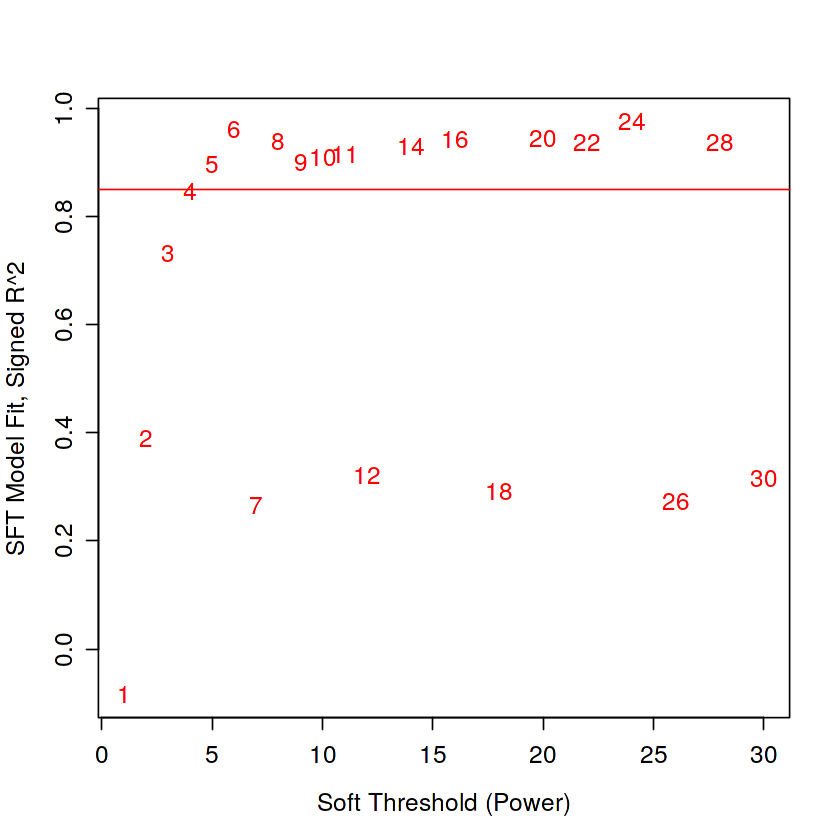

In [14]:
# Scale-free topology fit index as a function of the soft-thresholding power
plot(RpowerTable[,1], -sign(RpowerTable[,3])*RpowerTable[,2],xlab="Soft Threshold (Power)",ylab="SFT Model Fit, Signed R^2",type="n",cex=1.2, cex.lab=1.2,cex.axis=1.2);
text(RpowerTable[,1], -sign(RpowerTable[,3])*RpowerTable[,2], labels=powers,cex=1.2,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.85,col="red"); #select h corresponding to SFT.R.sq (3rd column in RpowerTable around 0.85 or above


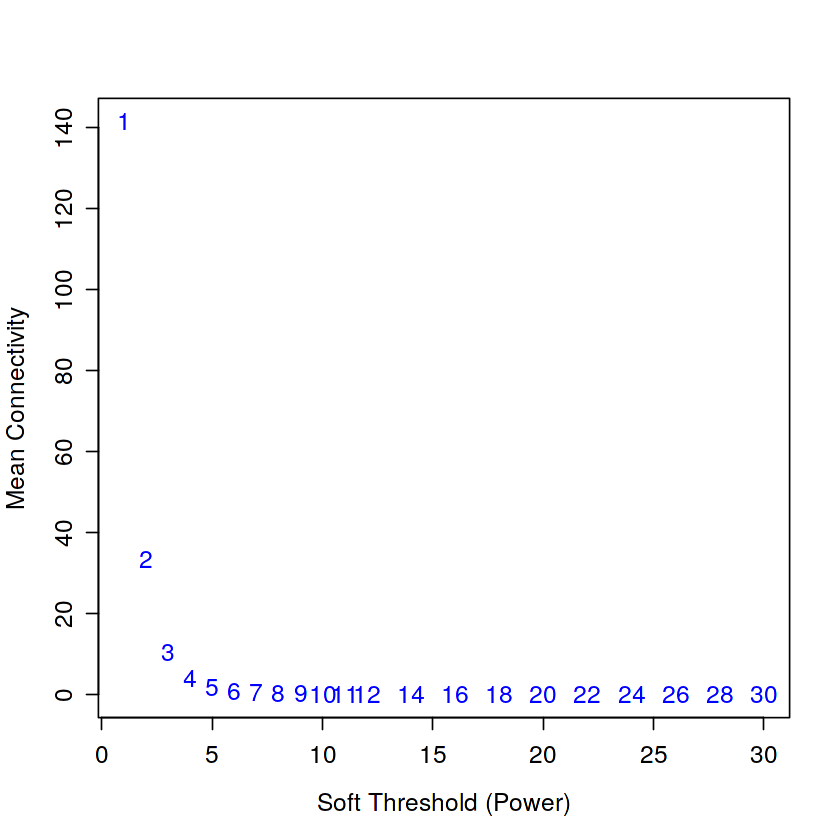

In [15]:

plot(RpowerTable[,1], RpowerTable[,5],xlab="Soft Threshold (Power)",ylab="Mean Connectivity", type="n", cex=1.2, cex.lab=1.2,cex.axis=1.2);
text(RpowerTable[,1], RpowerTable[,5], labels=powers,cex=1.2,col="blue");


 softConnectivity: FYI: connecitivty of genes with less than 167 valid samples will be returned as NA.
 ..calculating connectivities.. 


scaleFreeRsquared,slope
<dbl>,<dbl>
0.96,-1.51


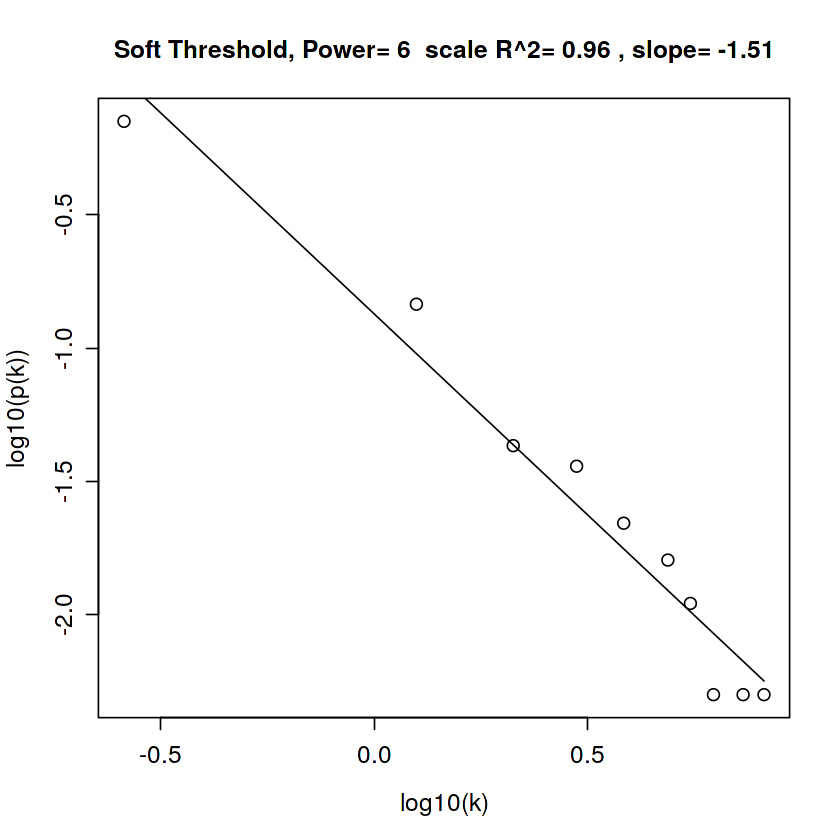

In [16]:
beta1 = 6;     #select Power (beta) corresponding to SFT.R.sq (3rd column in RpowerTable around 0.85 or above
Connectivity = softConnectivity(t_lihc_degexpr, power = beta1);#  -1;
scaleFreePlot(Connectivity, main=paste("Soft Threshold, Power=",beta1), truncated=F,cex.axis=1.2,cex.lab=1.2,cex=1.2);


In [17]:
adj_lihc = adjacency(t_lihc_degexpr, power = 6,type = "signed");
TOM_lihc = TOMsimilarity(adj_lihc);
disTOM_lihc = 1 - TOM_lihc;

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [18]:
geneTree_lihc = hclust(as.dist(disTOM_lihc), method = "average");
dynamicMods_lihc = cutreeDynamic(dendro = geneTree_lihc, distM = disTOM_lihc, deepSplit = 2, pamRespectsDendro = FALSE, minClusterSize = 30);
dynamicColors_lihc = labels2colors(dynamicMods_lihc);


 ..cutHeight not given, setting it to 0.977  ===>  99% of the (truncated) height range in dendro.
 ..done.


In [19]:
table(dynamicMods_lihc)

dynamicMods_lihc
  1   2   3   4   5   6   7 
360 170 130 108  99  66  65 

In [20]:
length(unique(dynamicMods_lihc))
length(unique(dynamicColors_lihc))

write.table(dynamicMods_lihc,file = "./dynamicMods_hnsc_1935g.txt",sep="\t");
write.table(dynamicColors_lihc,file = "./dynamicColors_hnsc_1935g.txt",sep="\t");


[1] 7

[1] 7

In [21]:
sizeGrWindow(8,6);
plotDendroAndColors(geneTree_lihc, dynamicColors_lihc, "don't know",dendroLabels = FALSE, hang = 0.03,addGuide = TRUE, guideHang = 0.05);


In [22]:
# Calculate eigengenes
MEList_lihc = moduleEigengenes(t_lihc_degexpr, colors = dynamicColors_lihc)
MEs_lihc = MEList_lihc$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss_lihc = 1 - cor(MEs_lihc);
# Cluster module eigengenes
METree_lihc <- hclust(as.dist(MEDiss_lihc), method = "average");


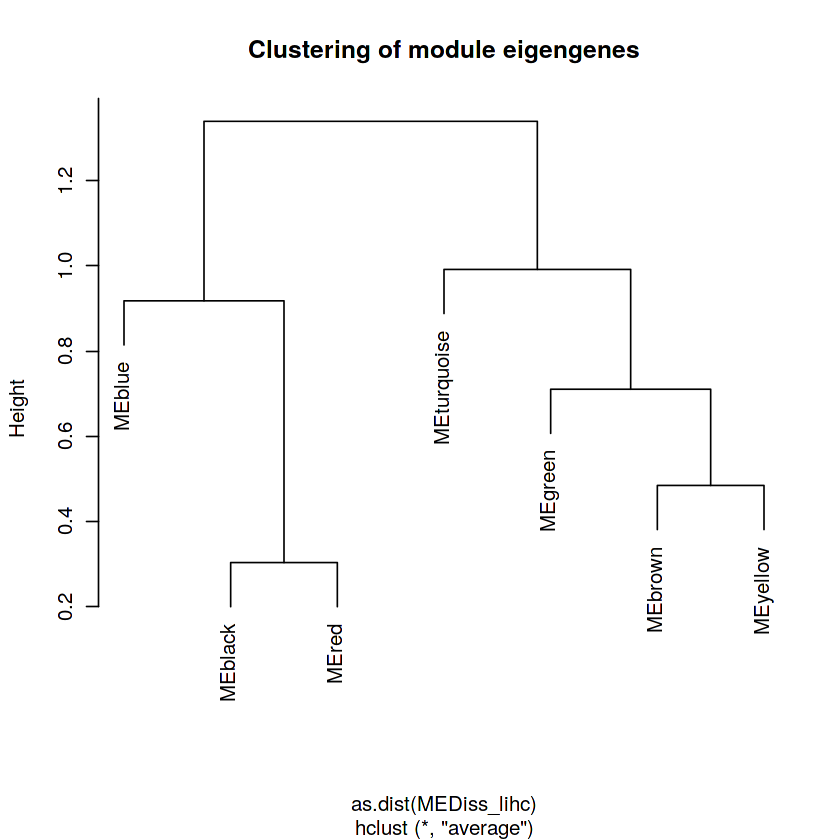

In [23]:
# Plot the result
plot(METree_lihc, main = "Clustering of module eigengenes")

In [24]:
MEDissThres_lihc = 0.25
# abline(h = MEDissThres_lihc, col = "red")
mergeMod_lihc = mergeCloseModules(t_lihc_degexpr, dynamicColors_lihc, cutHeight = MEDissThres_lihc, verbose = 3);
mergedColors_lihc = mergeMod_lihc$colors;
mergedMEs_lihc = mergeMod_lihc$newMEs;


 mergeCloseModules: Merging modules whose distance is less than 0.25
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 7 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 7 module eigengenes in given set.


In [25]:
length(unique(mergeMod_lihc))
length(unique(mergedColors_lihc))


[1] 5

[1] 7

In [26]:
sizeGrWindow(12, 9)
plotDendroAndColors(geneTree_lihc, cbind(dynamicColors_lihc, mergedColors_lihc),c("DynamicTree Cut", "Merged dynamic"),dendroLabels = FALSE, hang = 0.03,addGuide = TRUE, guideHang = 0.05);
colorOrder = c("grey", standardColors(50));
mergedModuleLabels_lihc = match(mergedColors_lihc, colorOrder) - 1;


In [27]:
table(mergedModuleLabels_lihc)

mergedModuleLabels_lihc
  1   2   3   4   5   6   7 
360 170 130 108  99  66  65 

In [28]:
length(unique(mergedModuleLabels_lihc))
length(unique(mergedColors_lihc))



[1] 7

[1] 7

In [29]:
#MEs_lihc

In [30]:
mergedMEs_lihc

,MEblue,MEblack,MEred,MEturquoise,MEgreen,MEbrown,MEyellow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-D6-6515-01A-21R-1873-07,-0.038492809,-0.002672182,0.004139061,0.0233294851,-0.0199256471,0.047766097,0.082539560
TCGA-CV-7180-01A-11R-2016-07,0.022949508,0.034948272,0.042130112,0.0019651182,-0.0510962132,-0.073058582,-0.066207040
TCGA-CV-7183-01A-11R-2016-07,-0.005602732,0.045402568,0.081366335,0.0351178465,-0.0661941118,-0.028125045,-0.068097754
TCGA-CV-A6JN-01A-11R-A31N-07,0.128108330,0.045765053,0.124412315,-0.1104156517,-0.0563784783,-0.058753222,-0.012965564
TCGA-CQ-7069-01A-11R-2403-07,-0.037717419,0.100066790,0.045580725,0.0327287558,-0.0415166898,-0.002239141,-0.030517979
TCGA-CQ-6219-01A-11R-1915-07,0.011278601,0.006923536,0.024786376,0.0009751001,-0.0374229007,0.007317659,0.028698563
TCGA-IQ-A6SH-01A-12R-A34R-07,0.050495028,0.032163112,0.060105313,-0.0660952190,-0.0465446071,-0.039559423,-0.007587832
TCGA-F7-A61V-01A-11R-A28V-07,0.028105779,-0.017021603,0.000697952,-0.0230840474,-0.0061494797,-0.030764513,-0.047144809
TCGA-HD-A6I0-01A-11R-A31N-07,0.172957588,0.017112925,0.115142082,-0.1398913401,-0.0556013078,-0.056037457,-0.005730428


In [31]:
write.table(MEs_lihc,"./me_hnsc_1935g.txt",sep="\t");
write.table(mergedMEs_lihc, file = "./mergedMEs_hnsc_1935g.txt",sep="\t");
write.table(mergedColors_lihc,file = "./mergedColors_hnsc_1935g.txt",sep="\t");
write.table(mergedModuleLabels_lihc, file = "./mergedModuleLabels_hnsc_1935g.txt",sep="\t");

#rm(adj_lihc,TOM_lihc,disTOM_lihc)

In [32]:
length(unique(rownames(lihc_degexpr)))
dim(TOM_lihc)

rownames(TOM_lihc) = rownames(lihc_degexpr)
colnames(TOM_lihc) = rownames(lihc_degexpr)


[1] 998

[1] 998 998

In [33]:
save.image("./Modules_HNSC_1935g.RData")

save(TOM_lihc,adj_lihc, file = "./TOM_Adj_hnsc.RData")

# savehistory("./hist_WGCNA_Modules_HNSC_1935g.R")